In [11]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['figure.dpi'] = 120

import pandas as pd
import seaborn as sns

In [12]:
sns.set(context='paper')

In [13]:
stats = pd.read_csv('priv/emqx_stats.csv')
stats = stats.groupby(['topic_len']).quantile(.95)
rmq_stats = pd.read_csv('priv/rmq_stats.csv')
rmq_stats = rmq_stats.groupby(['topic_len']).quantile(.95)

stats.rename(columns={'time': 'emqx'}, inplace=True)
stats['rmq'] = rmq_stats.time

stats = stats.astype(int)

Text(0, 0.5, 'Microsecond')

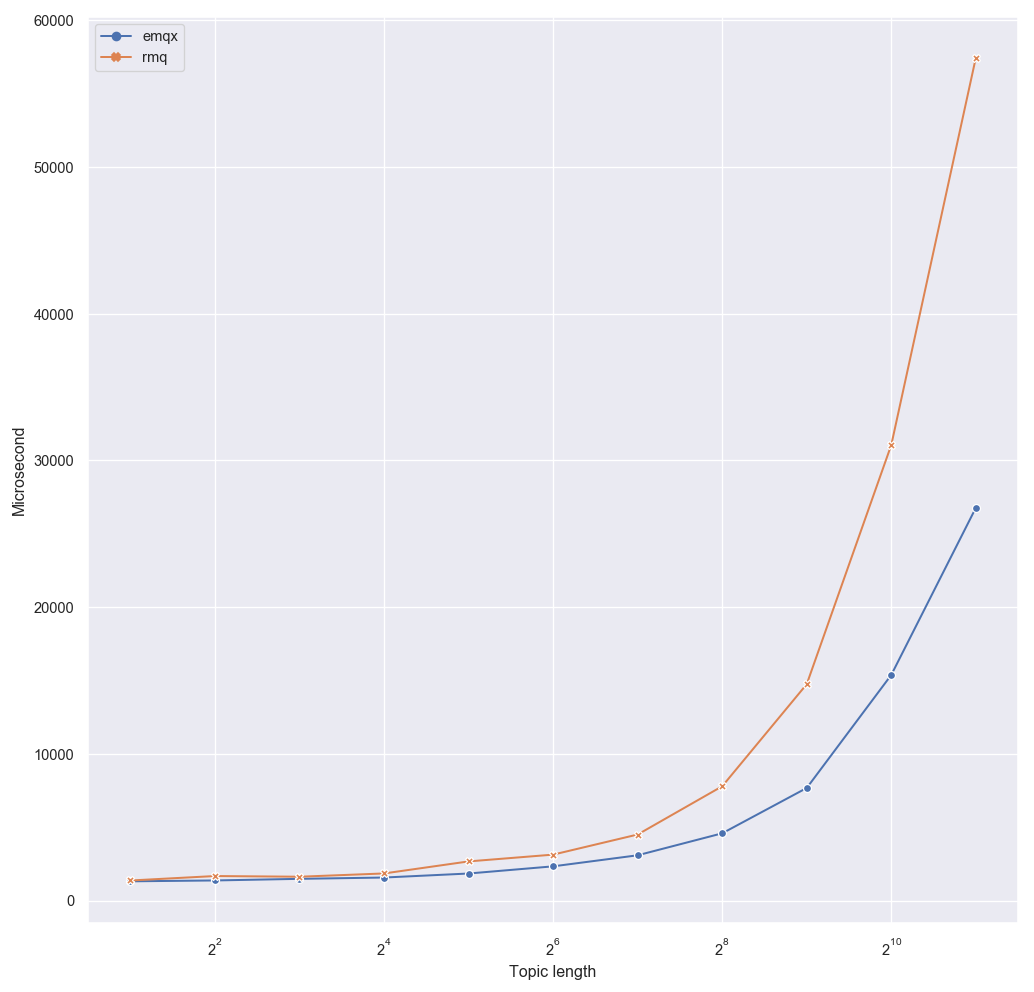

In [14]:
ax = sns.lineplot(data=stats[['emqx', 'rmq']], markers=True, dashes=False)
ax.set_xscale('log', basex=2)
ax.set_xlabel('Topic length')
ax.set_ylabel('Microsecond')